<a href="https://colab.research.google.com/github/hcq9102/Move/blob/main/lecture01_exampleRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load file from local drive

In [2]:

from google.colab import files
uploaded = files.upload()


Saving rating.txt to rating.txt


Choose file

In [3]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['rating.txt']), header=None, sep=' ', names=['user_id','item_id','rating'])

Now data is in dataframe df

In [8]:
df.head(20)

,user_id,item_id,rating
0,U103689342,I102776733,5.0
1,U416283446,I309072962,4.0
2,U958748467,I791952311,1.0
3,U886105810,I023614143,5.0
4,U088301039,I691183208,1.0
5,U846649677,I326247733,4.0
6,U547554510,I652236028,4.0
7,U625740506,I798200134,1.0
8,U083952822,I225515459,2.0
9,U207423018,I389701360,3.0


In [9]:
df.describe()

,rating
count,100000.000000
mean,3.603350
std,1.615241
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [11]:
ratings = pd.DataFrame(df.groupby('item_id')['rating'].mean())
ratings.head()

,rating
item_id,
I000003491,5.000000
I000034290,4.325581
I000061789,4.000000
I000138973,3.625000
I000250756,4.000000


In [12]:
ratings['number_of_ratings'] = df.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
I000003491,5.000000,1
I000034290,4.325581,43
I000061789,4.000000,1
I000138973,3.625000,8
I000250756,4.000000,1


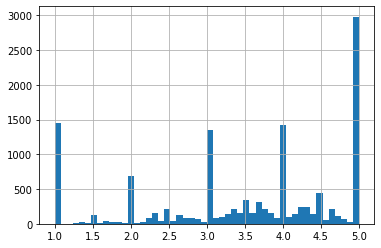

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

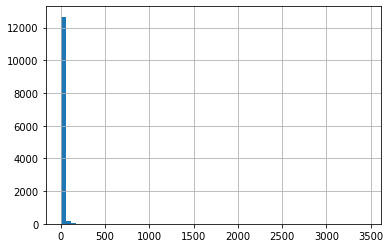

In [15]:
ratings['number_of_ratings'].hist(bins=60)

In [16]:
from collections import defaultdict
import math
allRatings = []
userRatings = defaultdict(list)
userItems = defaultdict(list)
userLikedItems = defaultdict(list)

In [17]:
for index, row in df.iterrows():
  userID = row['user_id']
  itemID = row['item_id']
  rating = float(row['rating'])
  allRatings.append(rating)
  userRatings[userID].append(rating)
  userItems[userID].append(itemID)
  if rating > 4.0:
    userLikedItems[userID].append(itemID)

In [18]:
print(userItems['U845167387'])

['I063668754', 'I981874545', 'I633843273', 'I822939121', 'I792989869', 'I112772863', 'I232939121', 'I476382071', 'I886121137', 'I902972211']


In [19]:
print(userRatings['U845167387'])

[5.0, 5.0, 5.0, 4.0, 5.0, 1.0, 4.0, 3.0, 5.0, 4.0]


In [20]:
print(userLikedItems['U845167387'])

['I063668754', 'I981874545', 'I633843273', 'I792989869', 'I886121137']


In [56]:
def similarity_jaccard(set1, set2):
    if len(set1.union(set2)) < 0:
        return 0
    else:
        c1 = set1.intersection(set2)
        c2 = set1.union(set2)
        return float(len(c1))/float(len(c2))

You have to revise similarity_jaccard (it is a dummy function now) to make it a valid metric. 

After defining a valid metric, you can compute the similarity between two users. Here is an example.

In [57]:
print(userLikedItems['U845167387'])
print(userLikedItems['U992842409'])
print(similarity_jaccard(set(userLikedItems['U845167387']), set(userLikedItems['U992842409'])))


['I063668754', 'I981874545', 'I633843273', 'I792989869', 'I886121137']
['I981874545', 'I232939121']
0.16666666666666666


In [25]:
print(similarity_jaccard(set([123,135]),set([123,256])))

0.3333333333333333


Iterate over the dictionary of all users (key is the userid, value is the indices of liked items), and compute the similarity between the userid and the specific user 'U845167387'.



In [33]:
neighbors = {}
for key, value in userLikedItems.items():
    if key != 'U845167387':
      neighbors[key]=similarity_jaccard(set(value),set(userLikedItems['U845167387']))

Iterate over the dictionaryof neighbors, if the similarity is larger than a threshold, print it.

In [58]:
print(neighbors)
for key, value in neighbors.items():
  if value > 0.99:
    print(key)
    print(value)
    print(userLikedItems[key])

{'U103689342': 0.0, 'U886105810': 0.0, 'U399000427': 0.0, 'U304355125': 0.0, 'U471582458': 0.0, 'U658007369': 0.0, 'U457235014': 0.0, 'U928141982': 0.0, 'U640269483': 0.0, 'U220082526': 0.0, 'U055496302': 0.0, 'U502841842': 0.0, 'U271676114': 0.0, 'U117128681': 0.0, 'U144139738': 0.0, 'U883342400': 0.0, 'U788265854': 0.0, 'U998327986': 0.0, 'U260925991': 0.0, 'U911860894': 0.0, 'U772431328': 0.0, 'U852516007': 0.0, 'U935054684': 0.0, 'U791895378': 0.0, 'U472294464': 0.0, 'U572249639': 0.0, 'U279523527': 0.0, 'U452975897': 0.0, 'U656185430': 0.0, 'U776608450': 0.0, 'U211614739': 0.0, 'U410498236': 0.0, 'U374975675': 0.0, 'U403724226': 0.0, 'U651152078': 0.0, 'U017799736': 0.0, 'U769477537': 0.0, 'U525784314': 0.0, 'U326950486': 0.0, 'U904072333': 0.0, 'U646335348': 0.0, 'U545315017': 0.0, 'U429195795': 0.0, 'U432448172': 0.0, 'U729079527': 0.0, 'U311690928': 0.0, 'U392253952': 0.0, 'U350217257': 0.0, 'U935443079': 0.0, 'U387257245': 0.0, 'U811597973': 0.0, 'U523772175': 0.0, 'U954303475

Find users/neighbors whose Jaccard similarity to U845167387 is larger than (>0.2). (If there are multiple users satisfying the condition, list all of their ids)


In [72]:
for key, value in neighbors.items():
  if value > 0.2:
    print(key)
    print(value)
    print(userLikedItems[key])

U645280931
0.4
['I981874545', 'I063668754']
U317796054
0.3333333333333333
['I792989869', 'I760611623', 'I981874545']


Recommend items to the user U845167387. Given the neighbors computed previously, what are the item ids that are liked by at least one of the neighbors?

*`Given the neighbors computed previously:`* according to last question, those neighbors have >0.2 similarity with U845167387.  gathering these items.
*`Recommend items to the user U84516738:`* means user U84516738 never reading those items.

In [112]:
targetItems = defaultdict(int)
print('targetitems')
for key, val in neighbors.items():
    if val > 0.2:
        itemids=userLikedItems[key]
        for item in itemids:
          targetItems[item]+=1 
          

targetitems


In [111]:
print('Recommend items to U845167387')
for key, val in targetItems.items():
    if val > 0 and key not in set(userItems['U845167387']):
        print (key)

Recommend items to U845167387
I760611623
